In [6]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"
response=requests.get(url)
data=response.content
soup=BeautifulSoup(data, 'html.parser')

In [7]:
table=soup.find('table')
for row in table.find_all('tr'):
    cols = row.find_all('td')
    Language_name = cols[1].getText()
    annual_ave_salary = cols[3].getText()
    print("{}--->{}".format(Language_name,annual_ave_salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


In [8]:
table=soup.find('table')
for row in table.find_all('tr'):
    cols = row.find_all('td')
    Language_name = cols[1].getText()
    annual_ave_salary = cols[3].getText()
    #print("{}--->{}".format(Language_name,annual_ave_salary))
    
import pandas as pd
rows_l=[]
rows=[]
for row in table.find_all('tr'):
    cols = row.find_all('td')
    Language_name = cols[1].getText()
    rows_l.append(Language_name)
    annual_ave_salary = cols[3].getText()
    rows.append(annual_ave_salary)
    
    #print("{}--->{}".format(Language_name,annual_ave_salary))
df1=pd.DataFrame(rows_l[1:10], columns=['Language'])
df2=pd.DataFrame(rows[1:10], columns=['Average Annual Salary'])
final_df=pd.concat([df1,df2], axis=1)
final_df['Average Annual Salary'].replace('[\$,]', '', regex=True, inplace=True)
final_df['Average Annual Salary']=final_df['Average Annual Salary'].astype(float)
final_df.sort_values(by=['Average Annual Salary'], ascending=False, inplace=True)
#final_df.to_excel('popular-languages.xlsx')


In [9]:
import numpy as np
labels=final_df['Language'].tolist()
x = np.arange(len(labels))

Text(0.5, 1.0, 'Average Annual Salary')

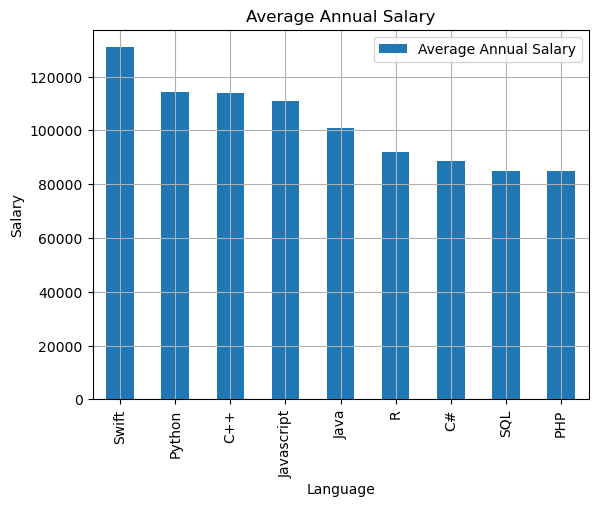

In [10]:
final_df.plot.bar()
plt.xlabel('Language')
plt.ylabel('Salary')
plt.grid(True)
plt.xticks(x, labels)
plt.title('Average Annual Salary')